In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import psycopg2 as ps

In [3]:
pip install pandas.io.sql

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pandas.io.sql (from versions: none)
ERROR: No matching distribution found for pandas.io.sql


In [4]:
import pandas.io.sql as psq

In [6]:
conn2=ps.connect(dbname="Project",

               user="postgres",password= "1234",host="localhost",

                port="5432")

In [7]:
sql = '''select * from raw_data'''

In [8]:
df=psq.read_sql_query(sql,conn2)

df

C:\Users\72013\AppData\Local\Temp\ipykernel_17112\1876392380.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=psq.read_sql_query(sql,conn2)


,date,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.330000,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.120000,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.340000,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.510000,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,112.715506,5.220885,6.196610,22.3,48.8,37.2,0.910,20.282,20974.0,282.0,22.761610,2.72,No_Machine_Failure
2496,1/2/2022,Makino-L1-Unit1-2013,Shopfloor-L1,103.086653,5.211886,7.074653,11.9,48.3,31.5,1.106,34.708,20951.0,319.0,22.786597,2.94,No_Machine_Failure
2497,1/2/2022,Makino-L2-Unit1-2015,Shopfloor-L2,118.643165,5.212991,6.530049,4.5,49.9,36.2,0.288,16.828,20958.0,335.0,22.778987,NaN,No_Machine_Failure
2498,1/2/2022,Makino-L3-Unit1-2015,Shopfloor-L3,145.855859,5.207777,6.402655,12.2,44.5,32.1,0.995,26.498,20935.0,376.0,22.804012,2.79,No_Machine_Failure


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.isnull().sum()

date                            0
machine_id                      0
assembly_line_no                0
hydraulic_pressure             10
coolant_pressure               19
air_system_pressure            17
coolant_temperature            12
hydraulic_oil_temperature      16
spindle_bearing_temperature     7
spindle_vibration              11
tool_vibration                 11
spindle_speed                   6
voltage                         6
torque                         21
cutting                         7
downtime                        0
dtype: int64

In [14]:
hp_m, cp_m, asp_m = df['hydraulic_pressure'].mean(), df['coolant_pressure'].mean(), df['air_system_pressure'].mean()
ct_m, hot_m = df['coolant_temperature'].mean(), df['hydraulic_oil_temperature'].mean()
sbt_m, sv_m = df['spindle_bearing_temperature'].mean(), df['spindle_vibration'].mean()
tv_m, ss_m, vol_m = df['tool_vibration'].mean(), int(df['spindle_speed'].mean()), int(df['voltage'].mean())
tor_m, c_m = df['torque'].mean(), df['cutting'].mean()

In [16]:
df['hydraulic_pressure'].fillna(hp_m,inplace=True)
df['coolant_pressure'].fillna(cp_m,inplace=True)
df['air_system_pressure'].fillna(asp_m,inplace=True)
df['coolant_temperature'].fillna(ct_m,inplace=True)
df['hydraulic_oil_temperature'].fillna(hot_m,inplace=True)
df['spindle_bearing_temperature'].fillna(sbt_m,inplace=True)
df['spindle_vibration'].fillna(sv_m,inplace=True)
df['tool_vibration'].fillna(tv_m,inplace=True)
df['spindle_speed'].fillna(ss_m,inplace=True)
df['voltage'].fillna(vol_m,inplace=True)
df['torque'].fillna(tor_m,inplace=True)
df['cutting'].fillna(c_m,inplace=True)

In [17]:
df.isnull().sum()

date                           0
machine_id                     0
assembly_line_no               0
hydraulic_pressure             0
coolant_pressure               0
air_system_pressure            0
coolant_temperature            0
hydraulic_oil_temperature      0
spindle_bearing_temperature    0
spindle_vibration              0
tool_vibration                 0
spindle_speed                  0
voltage                        0
torque                         0
cutting                        0
downtime                       0
dtype: int64

In [19]:
df = df.drop(['date'], axis =1)

In [20]:
df.head()

,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime
0,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lbl = LabelEncoder()
df['machine_id'] = lbl.fit_transform(df['machine_id'])
df['assembly_line_no'] = lbl.fit_transform(df['assembly_line_no'])
df['downtime'] = lbl.fit_transform(df['downtime'])

In [25]:
df.head()

,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime
0,0,0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0
1,0,0,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0
2,2,2,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0
3,1,1,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0
4,0,0,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0


In Machine Id = Encoding is done as "Makino-L1-Unit1-2013" is 0, "Makino-L2-Unit1-2015" is 1 and "Makino-L3-Unit1-2015" is 2. <br>
In Assembly Line No =Encoding is done as "Shopfloor-L1" is 0,"Shopfloor-L2" is 1 and "Shopfloor-L3" is 2.<br>
In Downtime = Machine Failure is encoded as 0 and No failure is encoded as 1.

In [26]:
df.corr()

,machine_id,assembly_line_no,hydraulic_pressure,coolant_pressure,air_system_pressure,coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed,voltage,torque,cutting,downtime
machine_id,1.000000,1.000000,0.007507,-0.004401,-0.014719,-0.009605,-0.000059,0.019720,0.019700,0.012976,-0.019431,0.006094,0.041018,0.004430,0.010375
assembly_line_no,1.000000,1.000000,0.007507,-0.004401,-0.014719,-0.009605,-0.000059,0.019720,0.019700,0.012976,-0.019431,0.006094,0.041018,0.004430,0.010375
hydraulic_pressure,0.007507,0.007507,1.000000,-0.074251,-0.029679,-0.110929,0.008604,0.022410,-0.006290,0.020873,-0.119989,-0.004040,0.161725,-0.221372,0.557075
coolant_pressure,-0.004401,-0.004401,-0.074251,1.000000,-0.028572,0.008164,0.001264,-0.012652,0.005619,-0.005019,0.088583,0.030963,-0.102941,0.168043,-0.171003
air_system_pressure,-0.014719,-0.014719,-0.029679,-0.028572,1.000000,0.048462,-0.025744,0.009832,0.008786,0.045392,-0.001628,0.006638,0.036527,-0.000813,-0.009182
coolant_temperature,-0.009605,-0.009605,-0.110929,0.008164,0.048462,1.000000,0.004371,-0.017203,0.012173,0.006582,0.072872,0.011329,-0.070351,0.096698,-0.168816
hydraulic_oil_temperature,-0.000059,-0.000059,0.008604,0.001264,-0.025744,0.004371,1.000000,0.040655,-0.006102,-0.015458,0.004935,0.026717,-0.006693,-0.019806,0.012606
spindle_bearing_temperature,0.019720,0.019720,0.022410,-0.012652,0.009832,-0.017203,0.040655,1.000000,-0.035360,-0.007189,0.030230,0.015029,-0.003241,0.003088,0.019444
spindle_vibration,0.019700,0.019700,-0.006290,0.005619,0.008786,0.012173,-0.006102,-0.035360,1.000000,-0.019327,0.018679,0.005339,0.027937,-0.018666,0.016628
tool_vibration,0.012976,0.012976,0.020873,-0.005019,0.045392,0.006582,-0.015458,-0.007189,-0.019327,1.000000,0.008341,0.021861,-0.019021,-0.038439,0.005876


According to correlation matrix we can check the factors most dominantly affecting the downtime are (in descending order) : <br>
Hydraulic Pressure, Cutting, Torque, Spindle Speed, Coolant Pressure, Coolant temperature etc.<br>
So, we can ignore other columns and still get good insights.

<Axes: xlabel='hydraulic_pressure', ylabel='Count'>

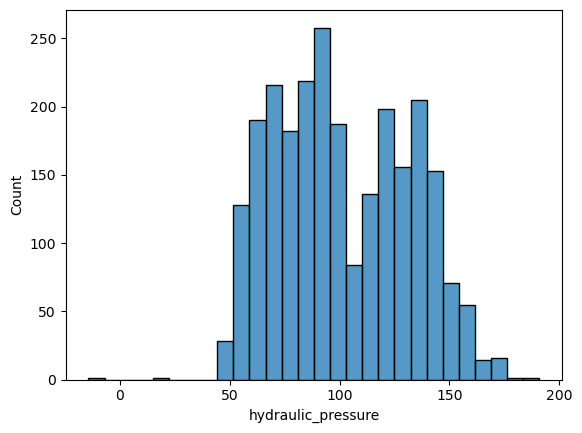

In [28]:
sns.histplot(df['hydraulic_pressure'])

<Axes: xlabel='cutting', ylabel='Count'>

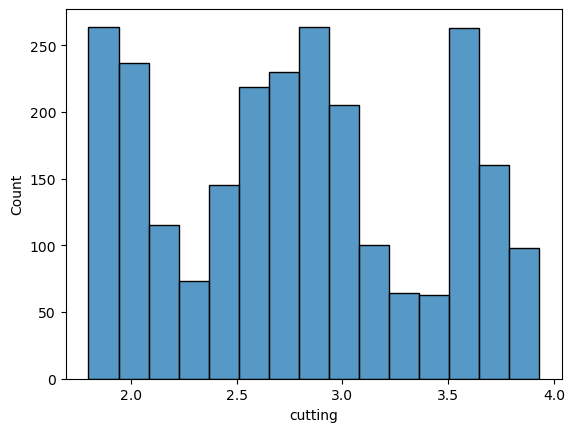

In [29]:
sns.histplot(df['cutting'])

<Axes: xlabel='torque', ylabel='Count'>

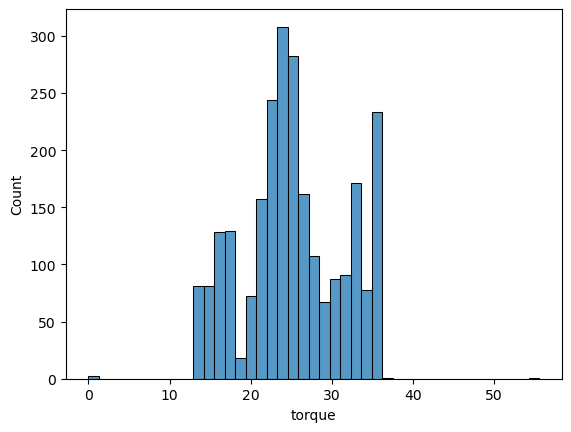

In [30]:
sns.histplot(df['torque'])

<Axes: xlabel='spindle_speed', ylabel='Count'>

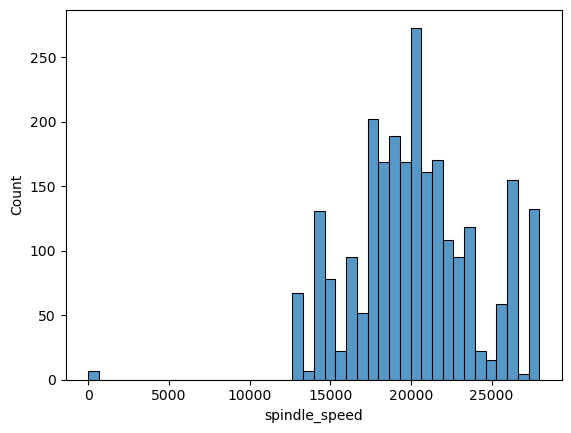

In [31]:
sns.histplot(df['spindle_speed'])

<Axes: xlabel='coolant_pressure', ylabel='Count'>

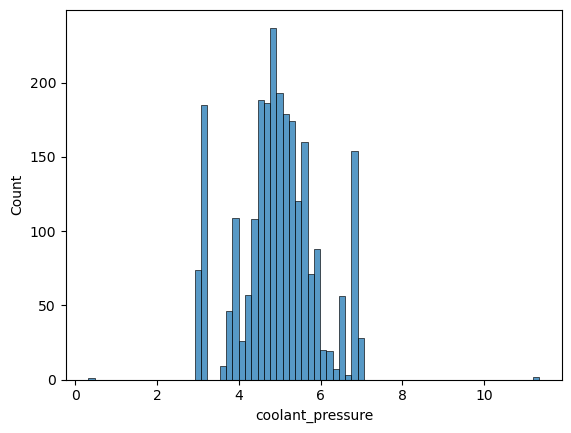

In [32]:
sns.histplot(df['coolant_pressure'])

<Axes: xlabel='coolant_temperature', ylabel='Count'>

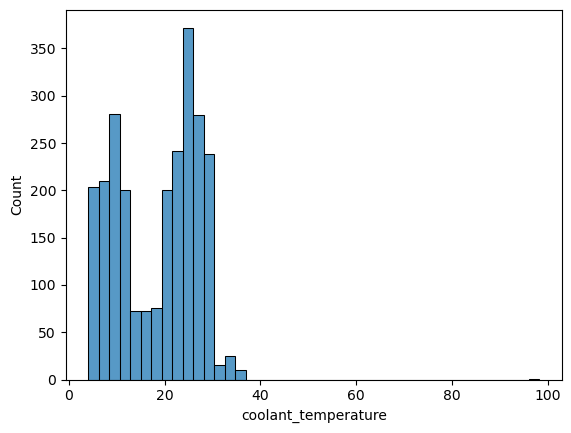

In [33]:
sns.histplot(df['coolant_temperature'])

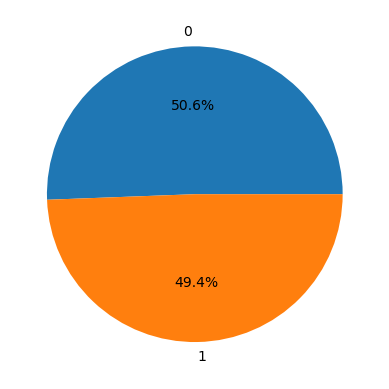

In [34]:
x = df['downtime'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

<Axes: xlabel='downtime', ylabel='hydraulic_pressure'>

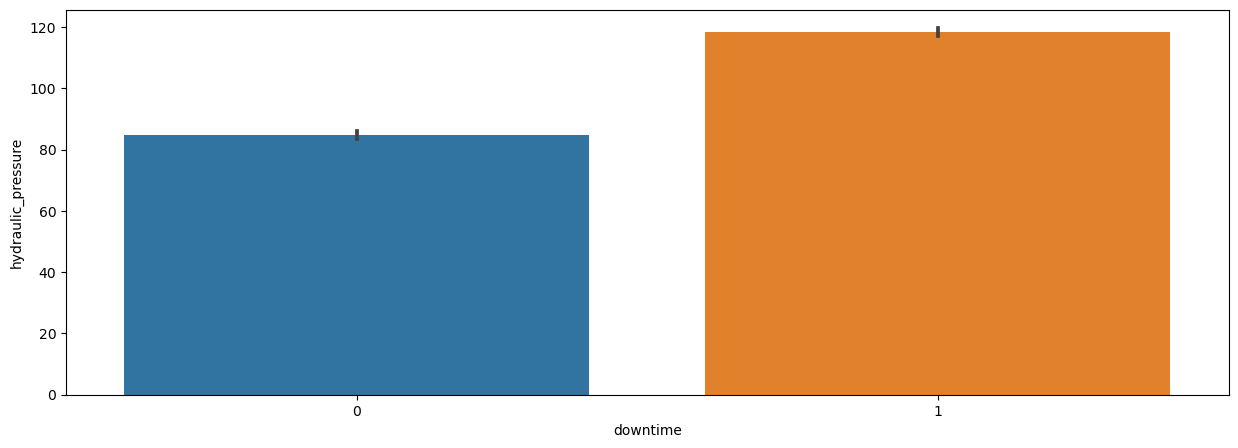

In [35]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['hydraulic_pressure'])

<Axes: xlabel='downtime', ylabel='cutting'>

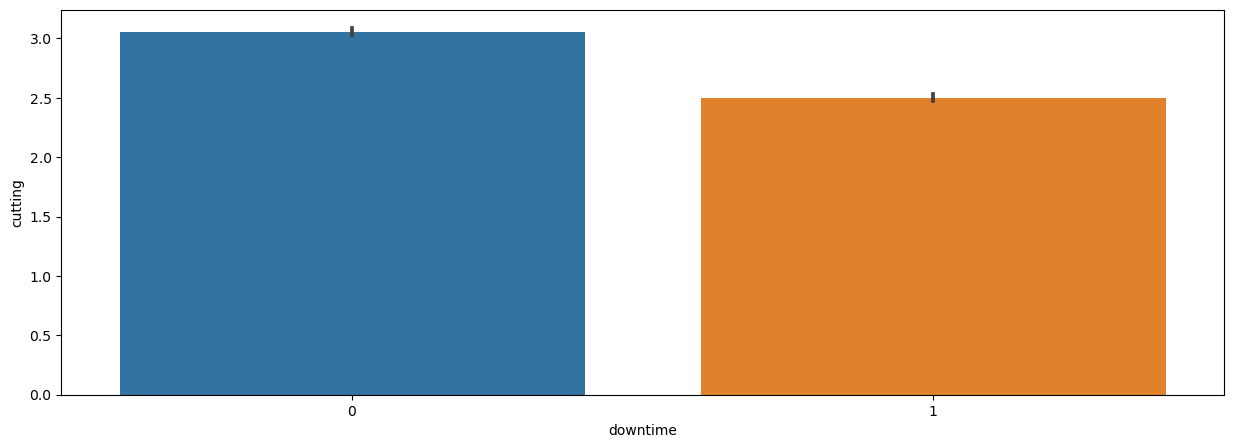

In [36]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['cutting'])

<Axes: xlabel='downtime', ylabel='torque'>

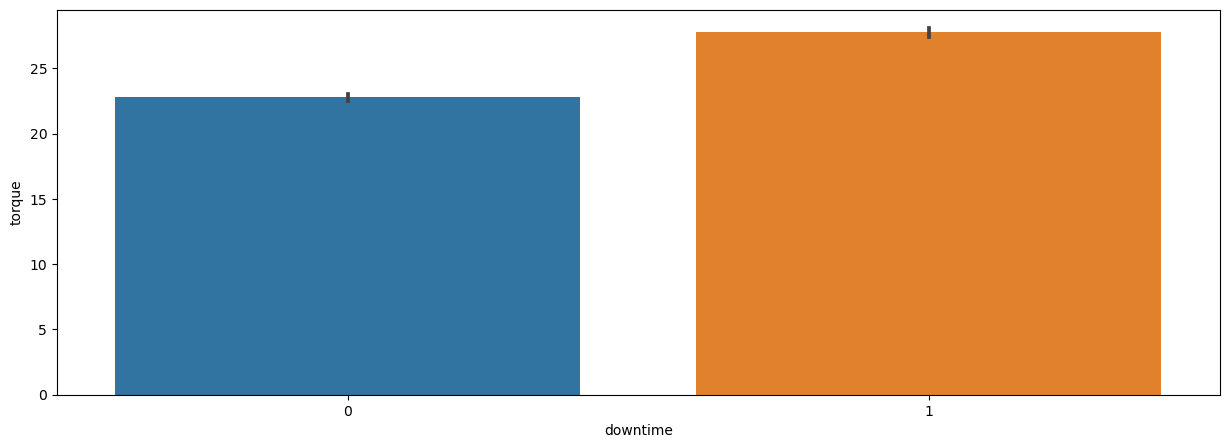

In [37]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['torque'])

<Axes: xlabel='downtime', ylabel='spindle_speed'>

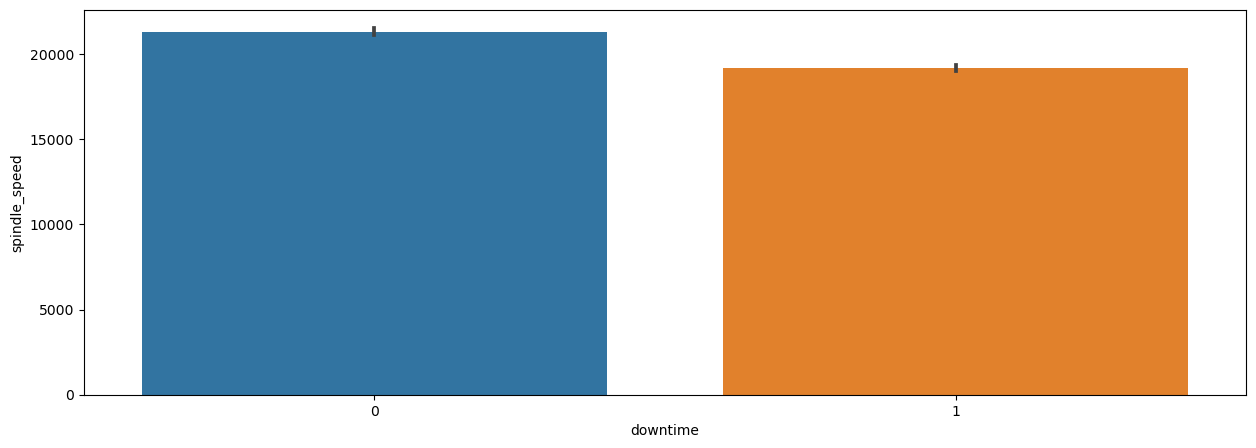

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['spindle_speed'])

<Axes: xlabel='downtime', ylabel='coolant_pressure'>

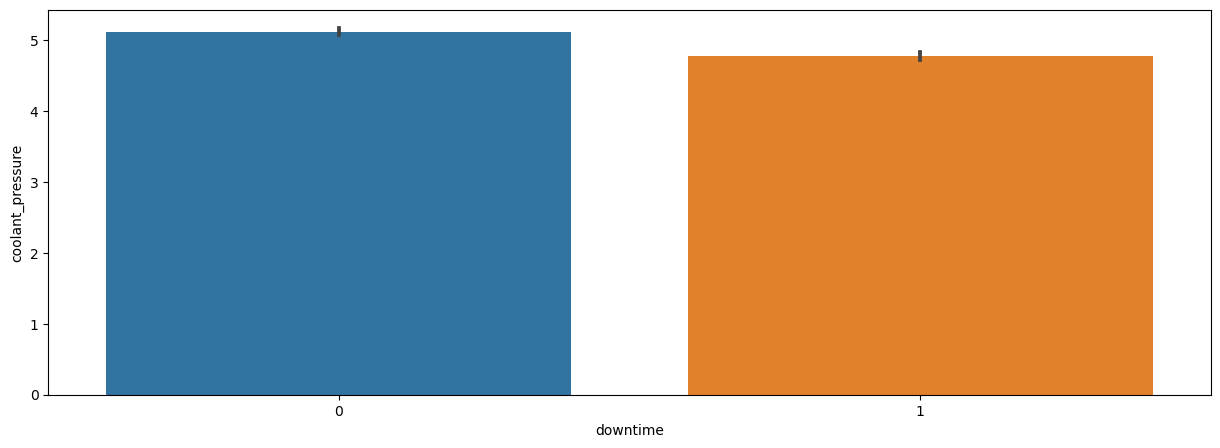

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['coolant_pressure'])

<Axes: xlabel='downtime', ylabel='coolant_temperature'>

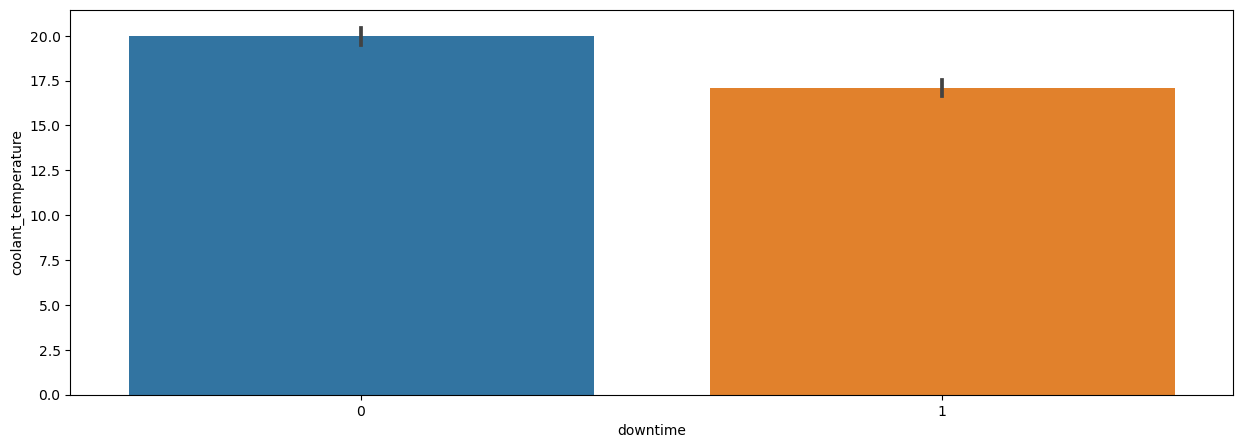

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['downtime'], y=df['coolant_temperature'])

In [41]:
df2 = df.drop(['machine_id','assembly_line_no','air_system_pressure','hydraulic_oil_temperature','spindle_bearing_temperature','spindle_vibration','tool_vibration','voltage'], axis = 1)

<Axes: >

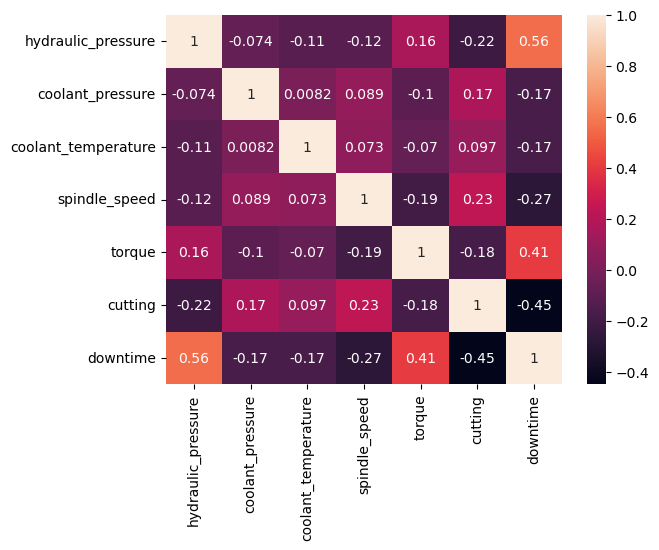

In [42]:
sns.heatmap(df2.corr(), annot=True)